# Homework 3 - Edge Detection and Hough Transform

Student: Nguyen Thu Huyen - 1900033

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

# Task 1 

Given the file “circuit.png”, write a program to carry out the following tasks and output the results:

	•	Rotate the image 33 degrees
	•	Find its edges using the Canny function
	•	Using Hough Transform to find lines in the image. An example result (yours may be different)

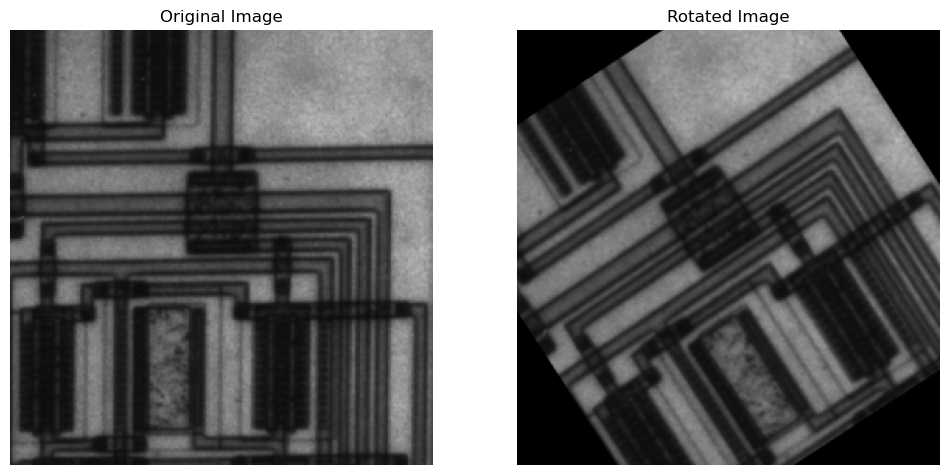

In [2]:
#read img 
img1 = cv2.imread('circuit.png')
# Convert to grayscale.
(h, w) = img1.shape[:2]
(cX, cY) = (w // 2, h // 2)
# rotate image 
M = cv2.getRotationMatrix2D((cX, cY), 33, 1.0)
rotated = cv2.warpAffine(img1, M, (w, h))

plt.figure(figsize = (12, 10))
plt.subplot(121); plt.axis('off'); plt.imshow(img1);     plt.title('Original Image')
plt.subplot(122); plt.axis('off'); plt.imshow(rotated);  plt.title('Rotated Image');

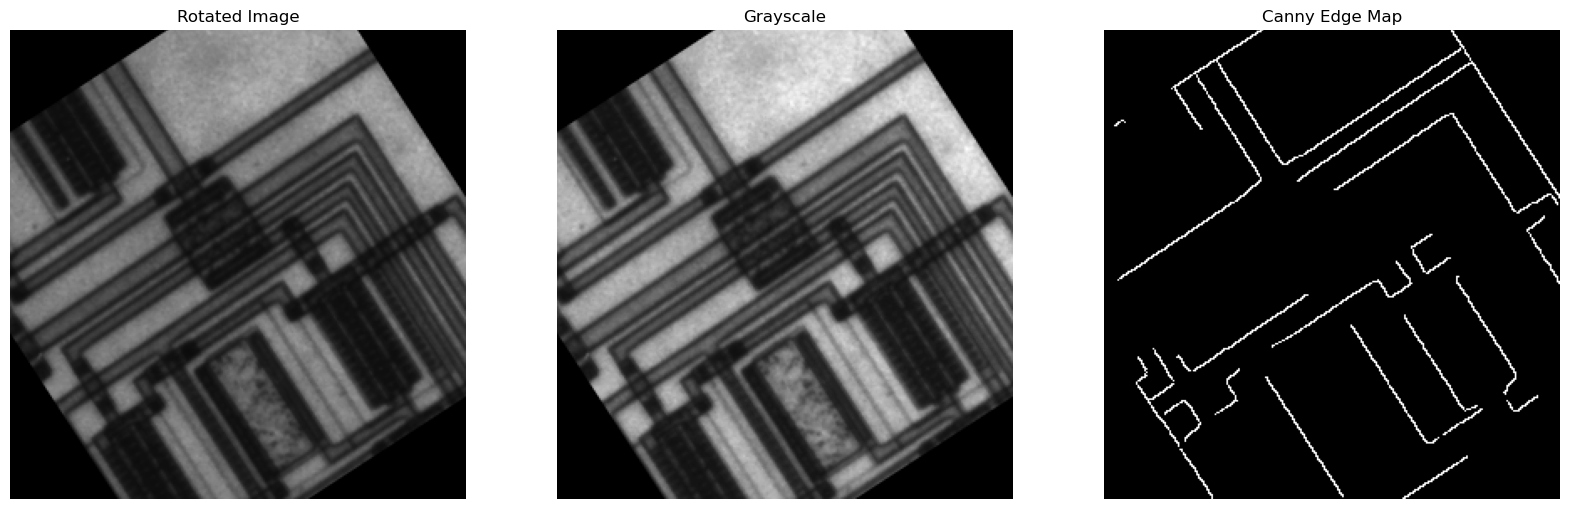

In [20]:
gr_rotated = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
gr_edges = cv2.Canny(gr_rotated, threshold1 = 180, threshold2 = 320)

plt.figure(figsize = (20,10))
plt.subplot(131); plt.axis("off"); plt.imshow(rotated[:,:,::-1]); plt.title('Rotated Image') 
plt.subplot(132); plt.axis("off"); plt.imshow(gr_rotated);      plt.title('Grayscale') 
plt.subplot(133); plt.axis("off"); plt.imshow(gr_edges);         plt.title('Canny Edge Map');

In [34]:
gr_edges.shape

(280, 272)

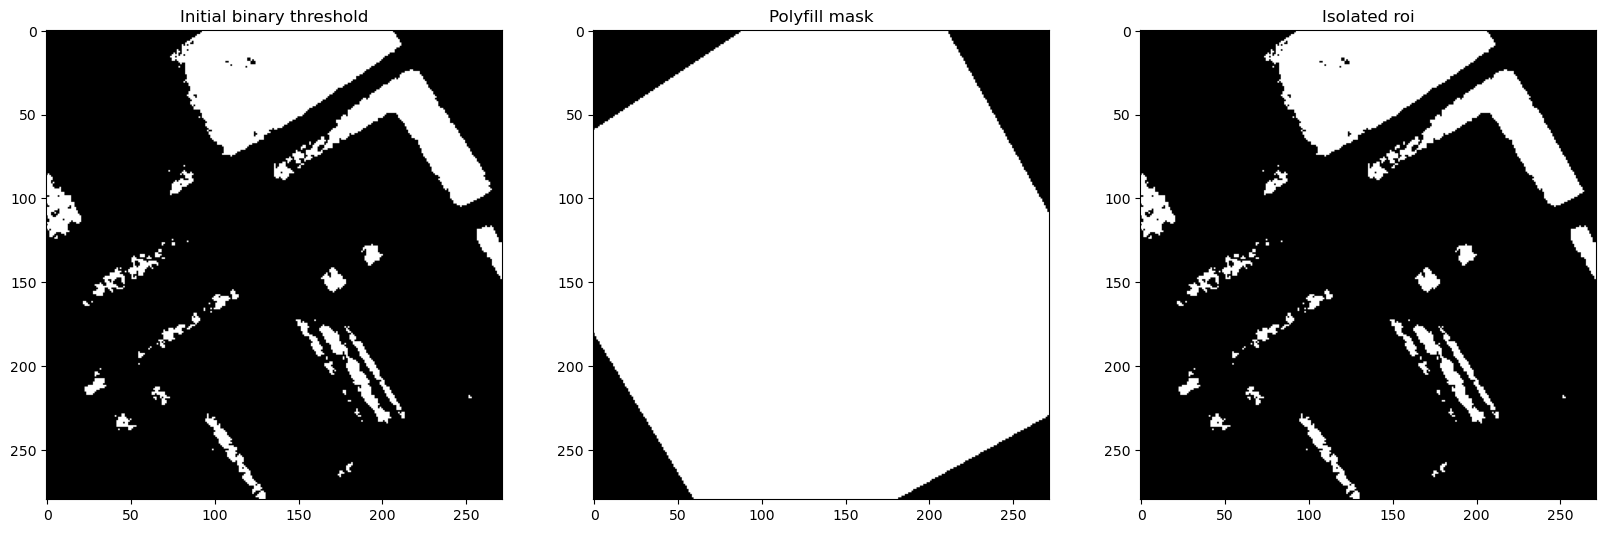

In [63]:
# thresholding with global binary threshold

ret, threshold0 = cv2.threshold(gr_rotated, 127, 255, cv2.THRESH_BINARY)

#  Region masking
roi_vertices = np.array([[[0, 60], [0, 180],
                         [60, 280], [180, 280],
                         [280, 225], [272, 110],
                         [210, 0], [90, 0]]])

mask = np.zeros_like(threshold0)   

# Defining a 3 channel or 1 channel color to fill the mask.
if len(threshold.shape) > 2:
    channel_count = threshold.shape[2]  # 3 or 4 depending on the image.
    ignore_mask_color = (255,) * channel_count
else:
    ignore_mask_color = 255

cv2.fillPoly(mask, roi_vertices, ignore_mask_color)

roi0 = cv2.bitwise_and(threshold0, mask)

# Display images.
plt.figure(figsize = (20, 10))
plt.subplot(1,3,1); plt.imshow(threshold0, cmap = 'gray'); plt.title('Initial binary threshold')
plt.subplot(1,3,2); plt.imshow(mask, cmap = 'gray');      plt.title('Polyfill mask')
plt.subplot(1,3,3); plt.imshow(roi0, cmap = 'gray');       plt.title('Isolated roi');

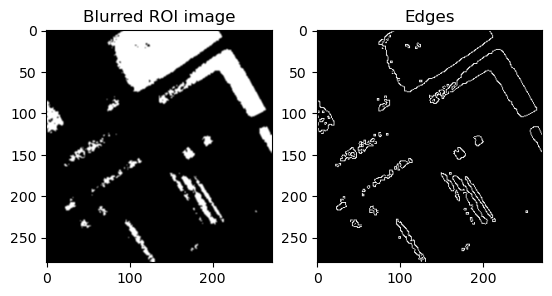

In [78]:
# Smooth with a Gaussian blur.
kernel_size = 3
roi_blur0 = cv2.GaussianBlur(roi0, (kernel_size, kernel_size), 0)

# Perform Edge Detection.
low_threshold = 50
high_threshold = 100
canny_blur0 = cv2.Canny(roi_blur0, low_threshold, high_threshold)

plt.subplot(1,2,1); plt.imshow(roi_blur0, cmap = 'gray'); plt.title('Blurred ROI image')
plt.subplot(1,2,2); plt.imshow(canny_blur0, cmap = 'gray'); plt.title('Edges');

In [83]:
def draw_lines(img, lines, color = [255, 0, 0], thickness = 2):
    """Utility for drawing lines."""
    if lines is not None:
        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(img, (x1, y1), (x2, y2), color, thickness)

Found 13 lines, including: [[139  88 205  49]]


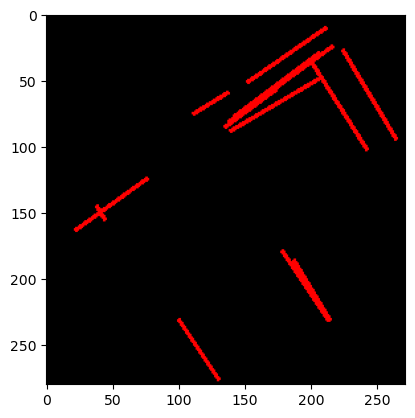

In [84]:
# Hough transform parameters set according to the input image.
img = gr_rotated
rho = 1
theta = np.pi / 180
threshold = 50
min_line_len = 10
max_line_gap = 20

lines = cv2.HoughLinesP(
    canny_blur0, rho, theta, threshold, minLineLength = min_line_len, maxLineGap = max_line_gap)

# Draw all lines found onto a new image.
hough0 = np.zeros((img.shape[0], img.shape[1], 3), dtype = np.uint8)
draw_lines(hough0, lines)

print("Found {} lines, including: {}".format(len(lines), lines[0]))
plt.imshow(hough0);

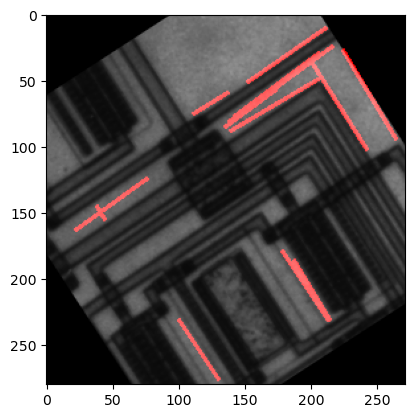

<Figure size 2000x1000 with 0 Axes>

In [88]:
#Blend to original image
alpha = 0.8
beta = 1.0
gamma = 0.0
circuit_annotated_0 = cv2.addWeighted(rotated, alpha, hough0, beta, gamma)
plt.imshow(circuit_annotated_0)
plt.figure(figsize = (20, 10))
circuit_annotated_0 = cv2.cvtColor(circuit_annotated_0, cv2.COLOR_BGR2RGB)
cv2.imwrite('./circuit-annotated-0.jpg', circuit_annotated_0);

Since binary thresholding produce an unpretty result (in my opinion), I chose adaptive thresholding and altering some parameters of `HoughP()` function to detect more lines

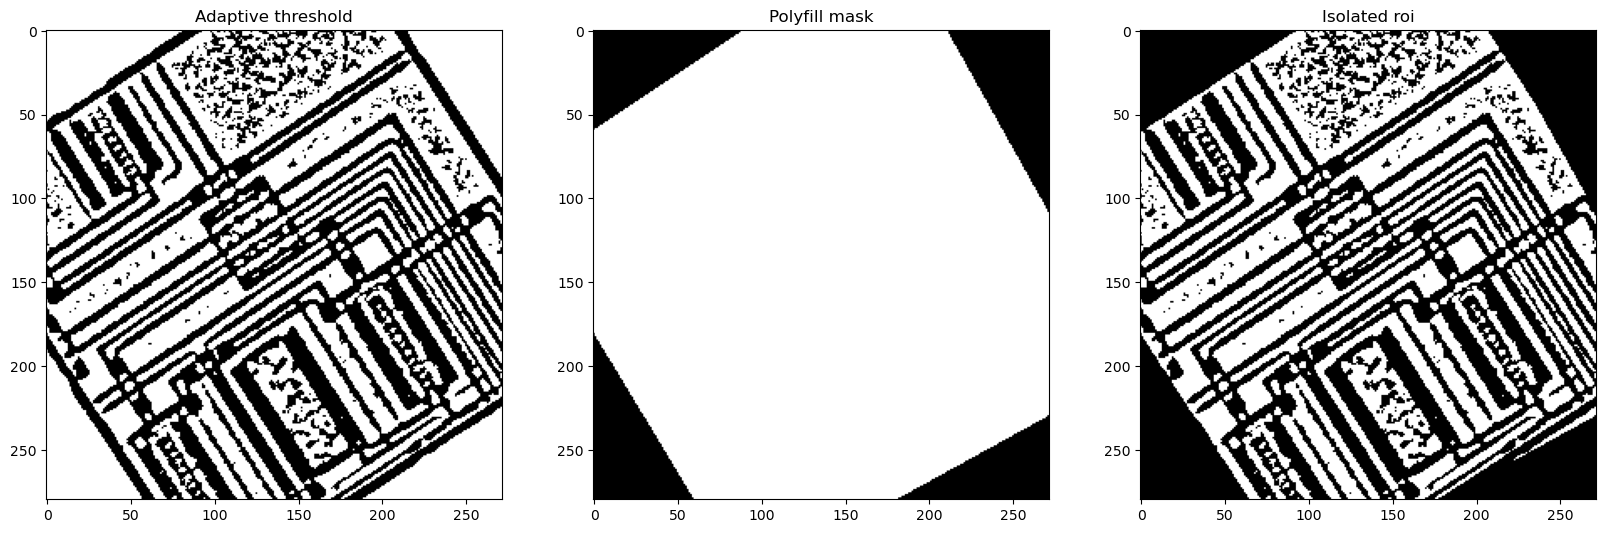

In [64]:
threshold = cv2.adaptiveThreshold(gr_rotated,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2) 

cv2.fillPoly(mask, roi_vertices, ignore_mask_color)
roi = cv2.bitwise_and(threshold, mask)

plt.figure(figsize = (20, 10))
plt.subplot(1,3,1); plt.imshow(threshold, cmap = 'gray'); plt.title('Adaptive threshold')
plt.subplot(1,3,2); plt.imshow(mask, cmap = 'gray');      plt.title('Polyfill mask')
plt.subplot(1,3,3); plt.imshow(roi, cmap = 'gray');       plt.title('Isolated roi');

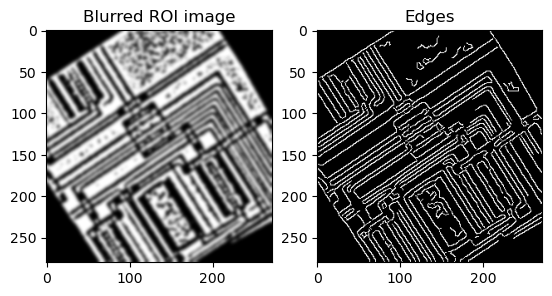

In [77]:
# Smooth with a Gaussian blur.
kernel_size = 11
roi_blur = cv2.GaussianBlur(roi, (kernel_size, kernel_size), 0)

# Perform Edge Detection.
low_threshold = 180
high_threshold = 360
canny_blur = cv2.Canny(roi_blur, low_threshold, high_threshold)

plt.subplot(1,2,1); plt.imshow(roi_blur, cmap = 'gray'); plt.title('Blurred ROI image')
plt.subplot(1,2,2); plt.imshow(canny_blur, cmap = 'gray'); plt.title('Edges');

Found 24 lines, including: [[  1 167 219  20]]


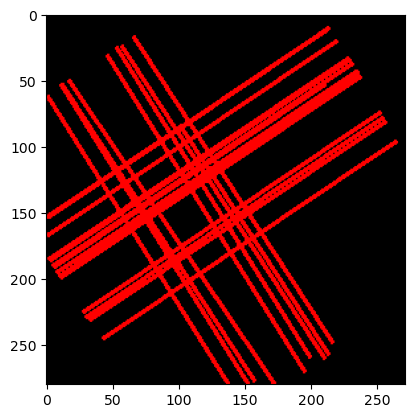

In [89]:
# Hough transform parameters set according to the input image.
img = gr_rotated
rho = 1
theta = np.pi / 180
threshold = 100
min_line_len = 30
max_line_gap = 50

lines = cv2.HoughLinesP(
    canny_blur, rho, theta, threshold, minLineLength = min_line_len, maxLineGap = max_line_gap)

# Draw all lines found onto a new image.
hough = np.zeros((img.shape[0], img.shape[1], 3), dtype = np.uint8)
draw_lines(hough, lines)

print("Found {} lines, including: {}".format(len(lines), lines[0]))
plt.imshow(hough);

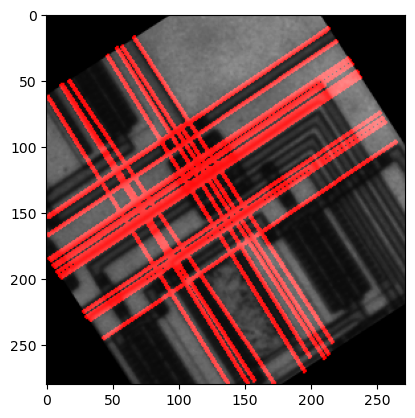

<Figure size 2000x1000 with 0 Axes>

In [90]:
#Blend to original image
alpha = 0.8
beta = 1.0
gamma = 0.0
circuit_annotated = cv2.addWeighted(rotated, alpha, hough, beta, gamma)
plt.imshow(circuit_annotated)
plt.figure(figsize = (20, 10))
circuit_annotated = cv2.cvtColor(circuit_annotated, cv2.COLOR_BGR2RGB)
cv2.imwrite('./circuit-annotated-1.jpg', circuit_annotated);

# Task 2 

Given the file “noisyImage.png”, write a program to carry out the following tasks and output the results:

	•	Remove noise using a Gaussian filter
	•	Find its edges using the Canny function
	•	Using Hough Transform to find lines in the image
    
Note: Your goal is to adjust the filtering, the edge finding, and the Hough algorithms to find the lines as best you can.

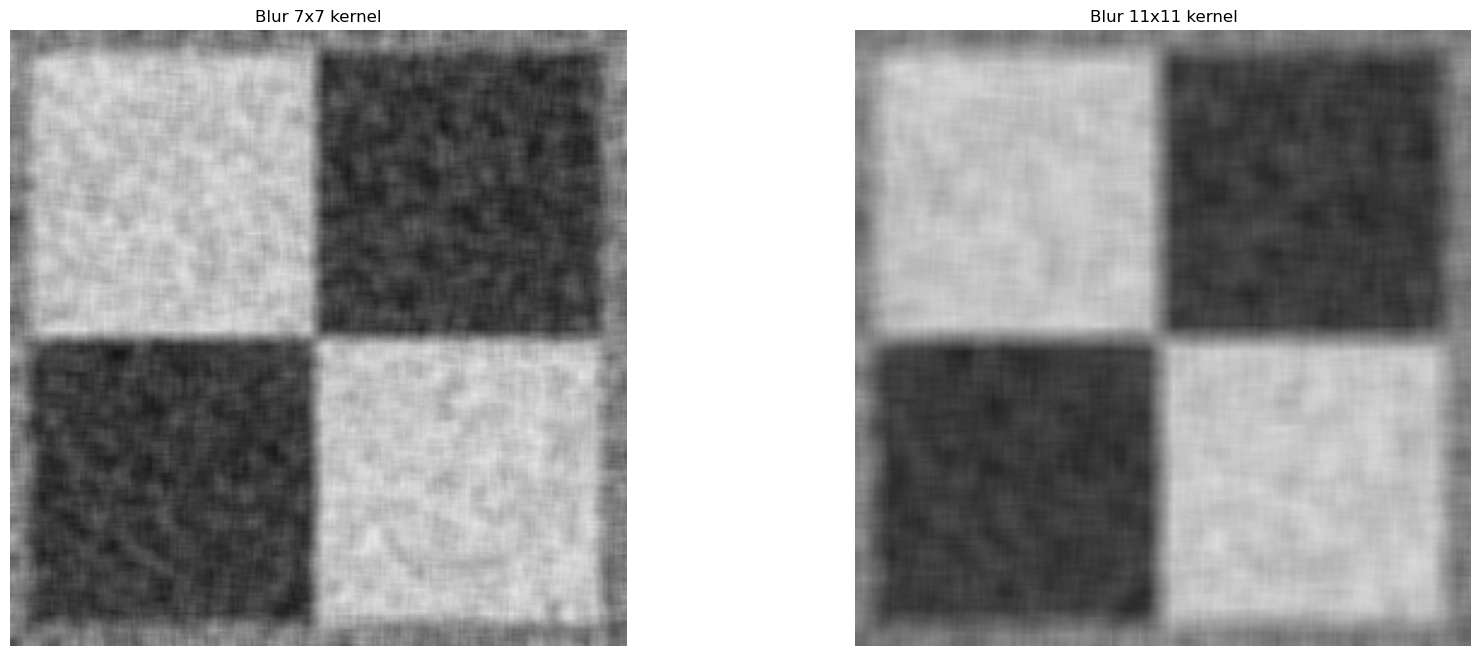

In [129]:
#Read noisy 
noisy = cv2.imread('noisyImage.png')
# Apply Gaussian blur.
noisy_blur1 = cv2.GaussianBlur(noisy, (7,7), 7, 7)
noisy_blur2 = cv2.GaussianBlur(noisy, (11,11), 11, 11)
# Display.
plt.figure(figsize = (20, 8))
plt.subplot(121); plt.axis('off'); plt.imshow(noisy_blur1[:,:,::-1]); plt.title('Blur 7x7 kernel');
plt.subplot(122); plt.axis('off'); plt.imshow(noisy_blur2[:,:,::-1]); plt.title('Blur 11x11 kernel');

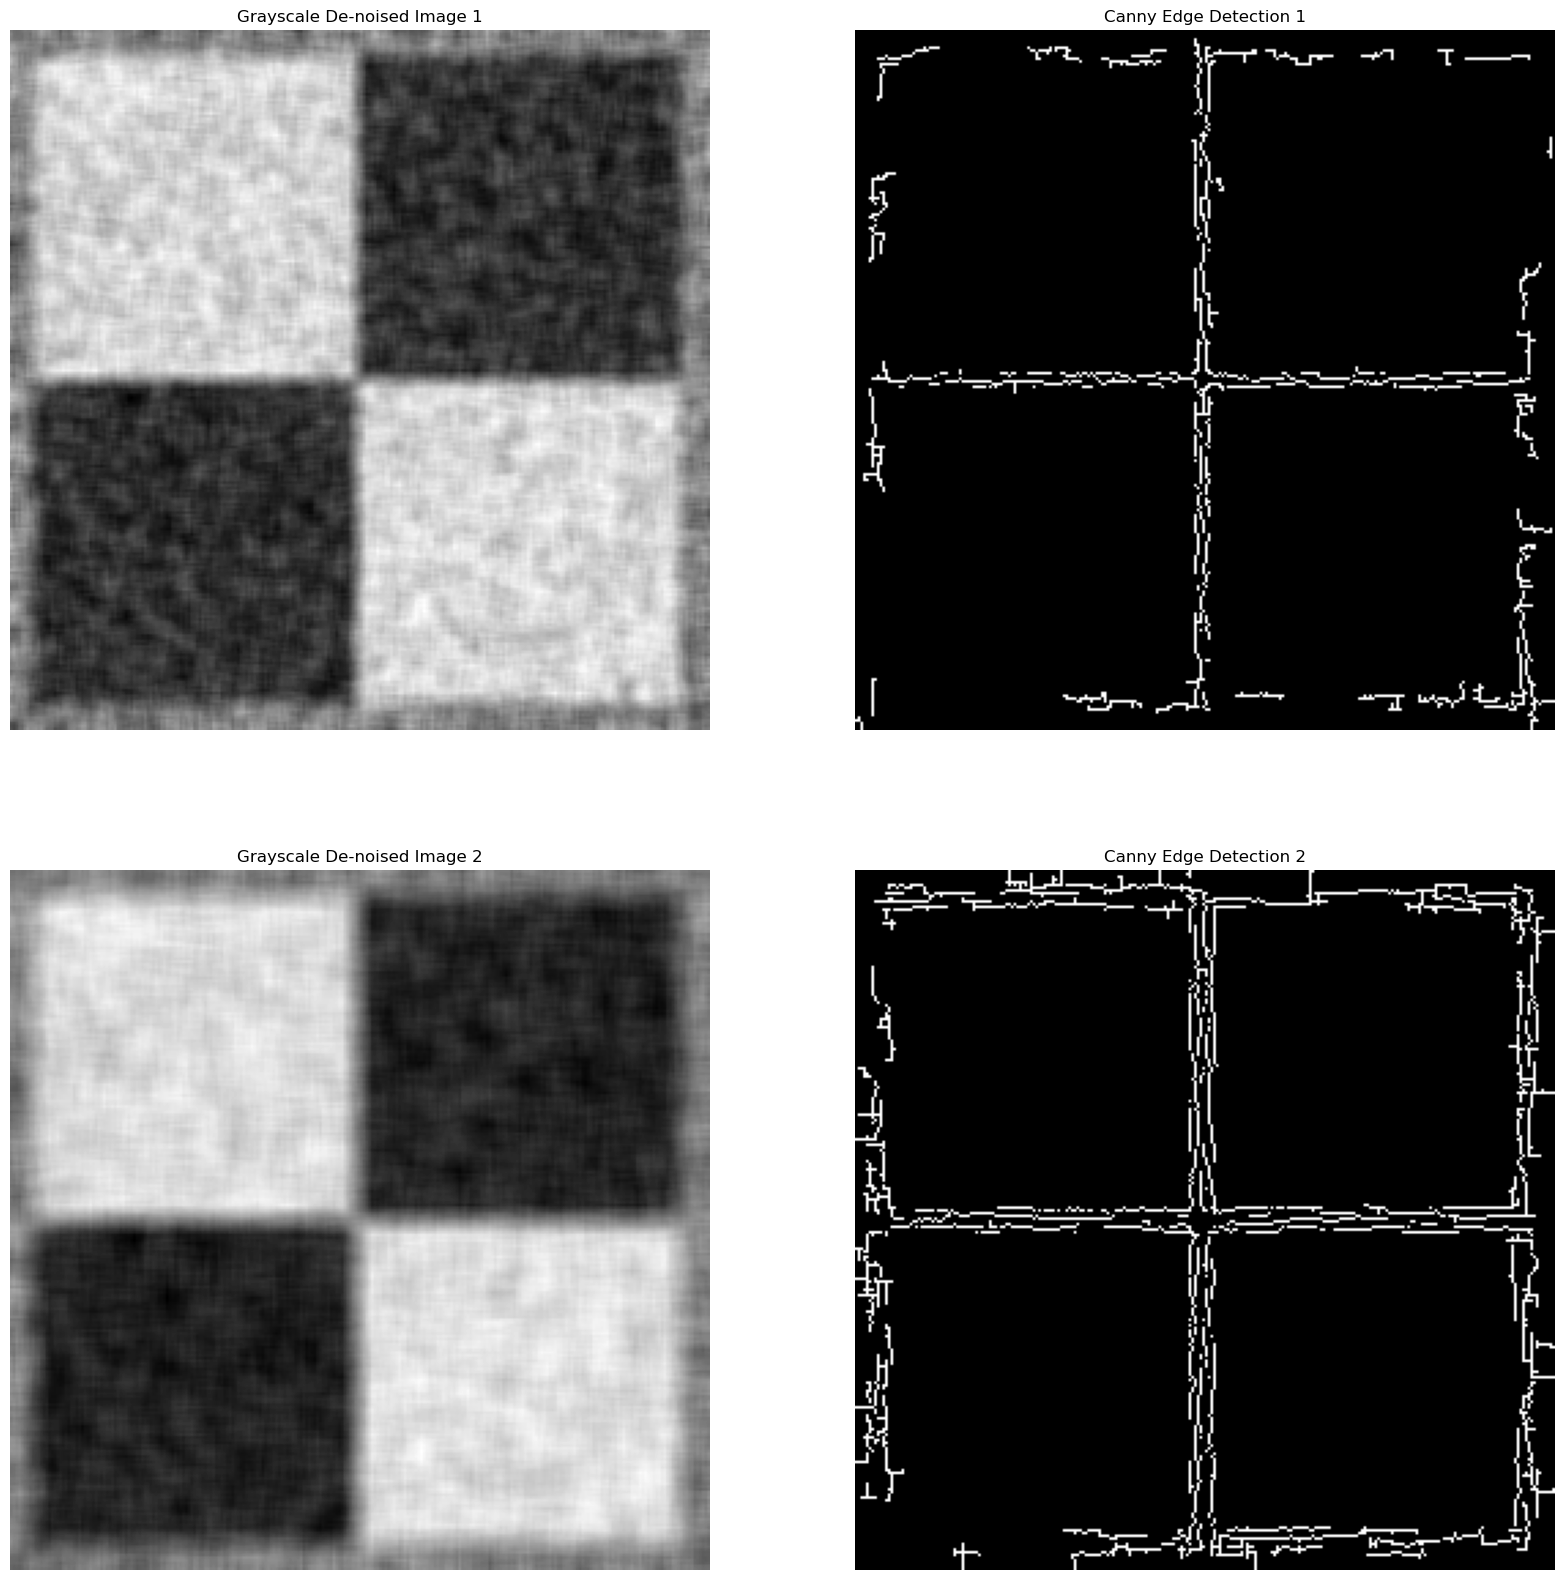

In [135]:
#Canny detection
noisy_gray1 = cv2.cvtColor(noisy_blur1, cv2.COLOR_BGR2GRAY)
noisy_edges1 = cv2.Canny(noisy_gray1, threshold1 = 100, threshold2 = 180)
noisy_gray2 = cv2.cvtColor(noisy_blur2, cv2.COLOR_BGR2GRAY)
noisy_edges2 = cv2.Canny(noisy_gray2, threshold1 = 50, threshold2 = 100)
plt.figure(figsize = (20, 20))
plt.subplot(221); plt.axis('off'); plt.imshow(noisy_gray1); plt.title('Grayscale De-noised Image 1');
plt.subplot(222); plt.axis('off'); plt.imshow(noisy_edges1); plt.title('Canny Edge Detection 1');
plt.subplot(223); plt.axis('off'); plt.imshow(noisy_gray2); plt.title('Grayscale De-noised Image 2');
plt.subplot(224); plt.axis('off'); plt.imshow(noisy_edges2); plt.title('Canny Edge Detection 2');

Text(0.5, 1.0, 'Smoothed Canny Edges')

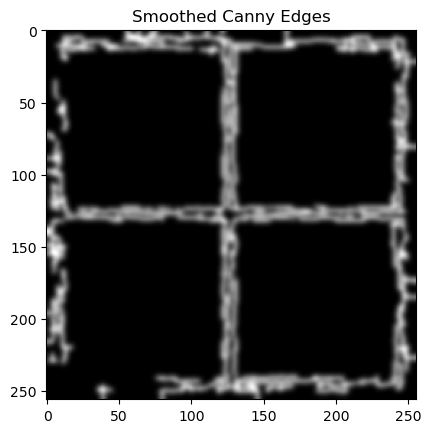

In [184]:
#Smooth edges 
edge_smoothed = cv2.GaussianBlur(noisy_edges2, (11, 11), 0)
plt.imshow(edge_smoothed); plt.title('Smoothed Canny Edges')

Found 38 lines, including: [[127   0 132 255]]


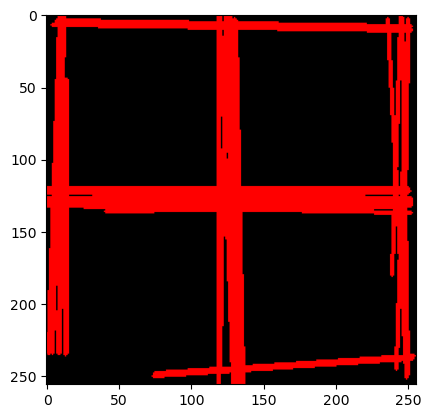

In [185]:
#Hough Transform 
def hough(img): 
    rho = 1
    theta = np.pi / 180
    threshold = 150
    min_line_len = 175
    max_line_gap = 10

    lines = cv2.HoughLinesP(
        img, rho, theta, threshold, minLineLength = min_line_len, maxLineGap = max_line_gap)

    # Draw all lines found onto a new image.
    hough = np.zeros((img.shape[0], img.shape[1], 3), dtype = np.uint8)
    draw_lines(hough, lines)

    print("Found {} lines, including: {}".format(len(lines), lines[0]))
    plt.imshow(hough);
    return hough
    
noisy_hough = hough(edge_smoothed)

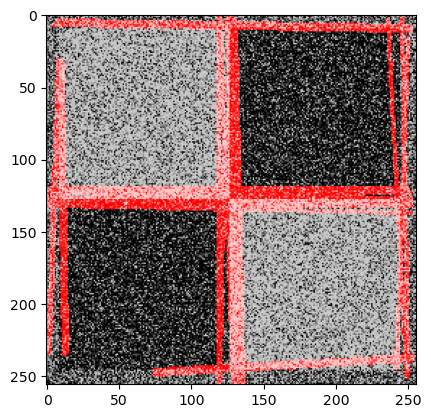

<Figure size 2000x1000 with 0 Axes>

In [176]:
#Blend to original image
alpha = 0.8
beta = 1.0
gamma = 0.0
noisy_annotated = cv2.addWeighted(noisy, alpha, noisy_hough, beta, gamma)
plt.imshow(noisy_annotated)
plt.figure(figsize = (20, 10))
circuit_annotated = cv2.cvtColor(noisy_annotated, cv2.COLOR_BGR2RGB)
cv2.imwrite('./noisy_annotated.jpg', noisy_annotated);

# Task 3 

Given the file “coins.png”, write a program to carry out the following tasks and output the results:

	•	Using Hough Transform to detect and fit circles to the coins.
	•	Output their size

Text(0.5, 1.0, 'Noise-reduced image')

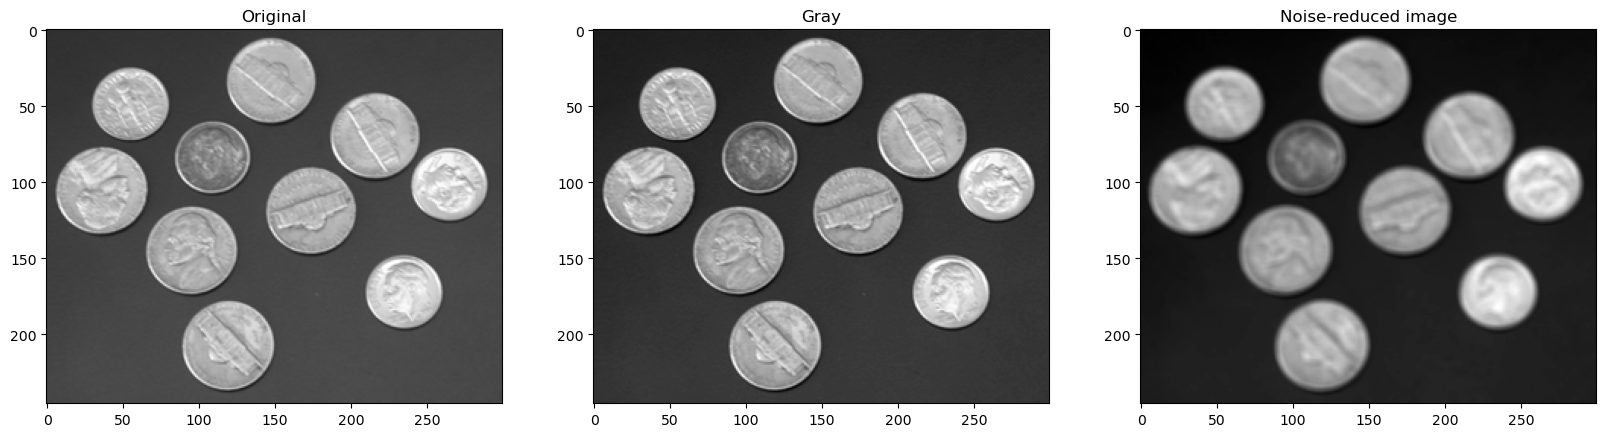

In [187]:
coins = cv2.imread('coins.png')
#convert to grayscale
coins_gr = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
#reduce noise 
coins_smooth = cv2.GaussianBlur(coins_gr, (5,5), 5,5)

plt.figure(figsize=(20,10))
plt.subplot(131); plt.imshow(coins[:,:,::-1]); plt.title("Original")
plt.subplot(132); plt.imshow(coins_gr); plt.title("Gray")
plt.subplot(133); plt.imshow(coins_smooth); plt.title("Noise-reduced image")

In [208]:
#Draw circles

def draw_circle(img, circles):
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            cv2.circle(img, center, 1, (0, 100, 100), 3)
            r = i[2] #circle radius
            cv2.circle(img, center, r, (255, 0, 255), 3)

        

Found 10 circle (s) with radius: [27.1, 25.1, 29.4, 29.4, 28.3, 28.3, 24.5, 22.9, 22.9, 27.1]


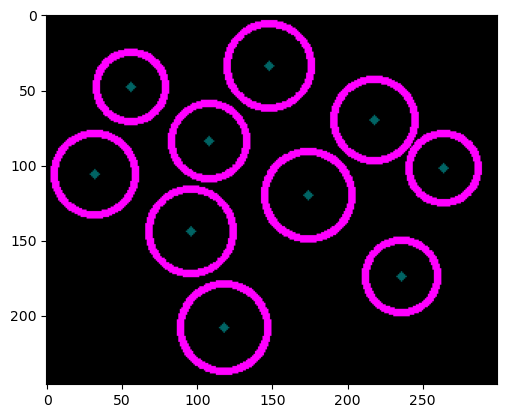

In [220]:
#Hough transform using HoughCircles 
img = coins_smooth
rows = img.shape[0]
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, rows / 8,
                           param1=100, param2=30,
                           minRadius=1, maxRadius=30)

# Draw all lines found circles to a new image.
hough_c = np.zeros((img.shape[0], img.shape[1], 3), dtype = np.uint8)
draw_circle(hough_c, circles)
circle_num = len(circles[0])
circle_size = [circles[0][i][2] for i in range(circle_num)]
print("Found {} circle (s) with radius: {}".format(circle_num, circle_size))
plt.imshow(hough_c)

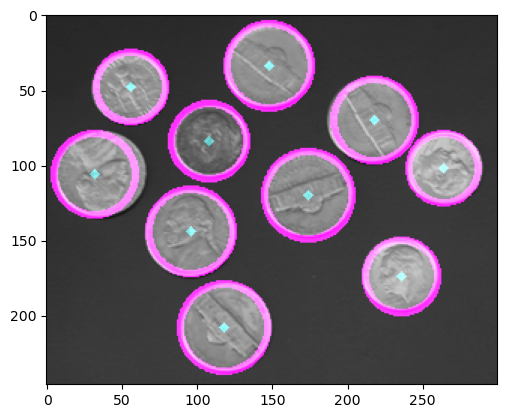

<Figure size 2000x1000 with 0 Axes>

In [223]:
#Blend to original image
alpha = 0.8
beta = 1.0
gamma = 0.0
coins_annotated = cv2.addWeighted(coins, alpha, hough_c, beta, gamma)
plt.imshow(coins_annotated)
plt.figure(figsize = (20, 10))
coins_annotated = cv2.cvtColor(coins_annotated, cv2.COLOR_BGR2RGB)
cv2.imwrite('./coins_annotated.jpg', coins_annotated);